In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.2.2 데이터 증강 실습

In [ ]:
import tensorflow_datasets as tfds

tfds.__version__

'4.6.0'

In [ ]:
dataset, info = tfds.load('rock_paper_scissors',
                           split='train',
                           with_info=True,
                           as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteHQGEZH/rock_paper_scissors-train.tfrecord*…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteHQGEZH/rock_paper_scissors-test.tfrecord*.…

Dataset rock_paper_scissors downloaded and prepared to ~/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='~/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }"

In [ ]:
info.features["label"].names

['rock', 'paper', 'scissors']

In [ ]:
info.features['label'].num_classes

3

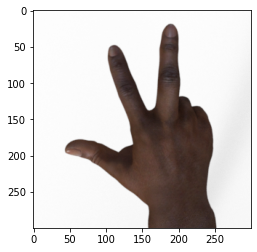

In [ ]:
import matplotlib.pyplot as plt

image, label = next(iter(dataset))
plt.imshow(image)

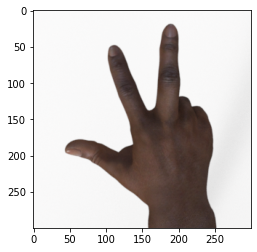

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers.experimental.preprocessing import RandomContrast

DataAugmentation_RandomContrast = Sequential([
    RandomContrast(factor=0.3, seed=0)
])

img = DataAugmentation_RandomContrast(image)
plt.imshow(img/255)

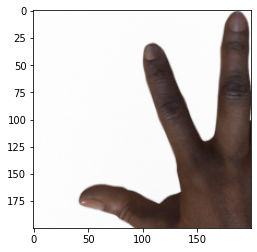

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import RandomCrop

DataAugmentation_RandomCrop = Sequential([
    RandomCrop(height=200, width=200, seed=0)
])

img = DataAugmentation_RandomCrop(image)
plt.imshow(img/255)

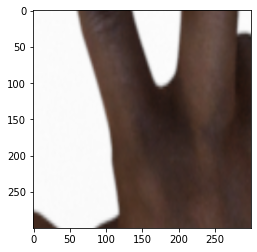

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom

DataAugmentation_RandomZoom = Sequential([
    RandomZoom(height_factor=.8, width_factor=.8)
])

img = DataAugmentation_RandomZoom(image)
plt.imshow(img/255)

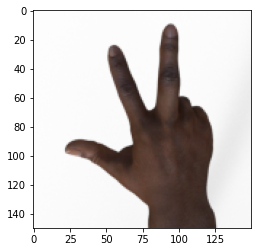

In [ ]:
# 크기 및 배율 조정하기
from tensorflow.keras.layers.experimental.preprocessing import Resizing
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

ResizingRescaling = Sequential([
    Resizing(height=150, width=150),
    Rescaling(scale=1./255)
])

img = ResizingRescaling(image)
plt.imshow(img)

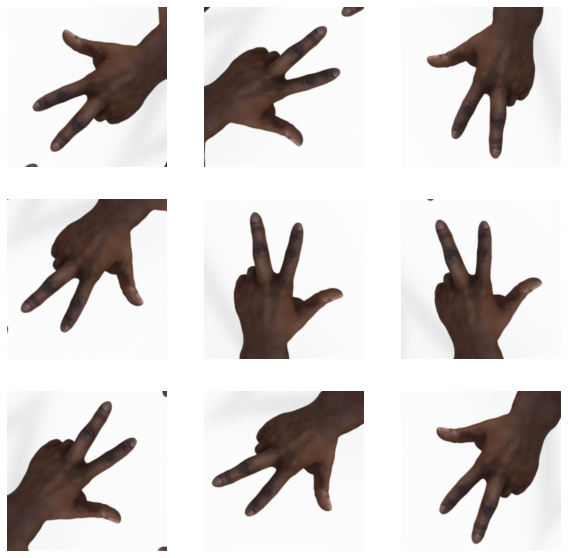

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation

# 데이터 증강
DataAugmentation = tf.keras.Sequential([
    RandomFlip(mode="horizontal_and_vertical", seed=0),
    RandomRotation(factor=0.2, seed=0)
])

# Add the image to a batch
img = tf.expand_dims(image, 0)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = DataAugmentation(img)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0]/255)
  plt.axis("off")